# Zeek Network Data to Plotting

### Software
- Zeek Analysis Tools (ZAT): https://github.com/SuperCowPowers/zat
- Pandas: https://github.com/pandas-dev/pandas
- Matplotlib: https://matplotlib.org

**Note:** This notebook is a version of notebook provide by Jupiter adapted for our aims 

## Quickly go from Zeek log to Pandas DataFrame

In [1]:
from zat.log_to_dataframe import LogToDataFrame
from zat.utils import plot_utils

# # Just some plotting defaults
# %matplotlib inline
import matplotlib.pyplot as plt
# plot_utils.plot_defaults()

# Convert it to a Pandas DataFrame
log_to_df = LogToDataFrame()
http_df = log_to_df.create_dataframe('http.log') ##this log file is an our file that Zeek has producted analyzing an input pcap file of Modbus dataset about attacks
http_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,tags,username,password,proxied,orig_fuids,orig_filenames,orig_mime_types,resp_fuids,resp_filenames,resp_mime_types
ts,,,,,,,,,,,,,,,,,,,,,
2007-03-08 16:49:23.720751104,CjEoBg3lIRYITkhO2d,151.100.122.171,42378,145.97.39.155,80,1,GET,it.wikipedia.org,/wiki/8_marzo,http://it.wikipedia.org/wiki/Pagina_principale,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,FWvBf68xU9d8k0euk,NaN,text/html
2007-03-08 16:49:24.720624896,CFBxTo4JNVYRJItxej,151.100.122.171,42379,145.97.39.156,80,1,GET,upload.wikimedia.org,/wikipedia/commons/b/b1/E0F0FF-FFFFFF.jpg,http://it.wikipedia.org/wiki/8_marzo,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-08 16:49:24.723187968,CxXZSu4gE6TwqRWiA9,151.100.122.171,42380,145.97.39.156,80,1,GET,upload.wikimedia.org,/wikipedia/it/4/4c/Icone_AdQ.png,http://it.wikipedia.org/wiki/8_marzo,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-08 16:49:24.725591040,C96T3M1RvGpiAhzh8k,151.100.122.171,42381,145.97.39.156,80,1,GET,upload.wikimedia.org,/wikipedia/it/e/e4/Segui_progetto_giorni.png,http://it.wikipedia.org/wiki/8_marzo,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,Flo2SH1a3KzTUbSZic,NaN,image/png
2007-03-08 16:49:43.217318144,Cdngwa4iqeNxg821Ql,151.100.122.171,42382,145.97.39.155,80,1,GET,it.wikipedia.org,/wiki/Festa_della_donna,http://it.wikipedia.org/wiki/8_marzo,...,(empty),NaN,NaN,NaN,NaN,NaN,NaN,FpssWsiV9UYMgPyBb,NaN,text/html


## Let's look at our data
We used a ZAT utility method to set up plotting defaults and here we simply use the plotting provided by Pandas.

array([[<Axes: title={'center': 'request_body_len'}>,
        <Axes: title={'center': 'response_body_len'}>]], dtype=object)

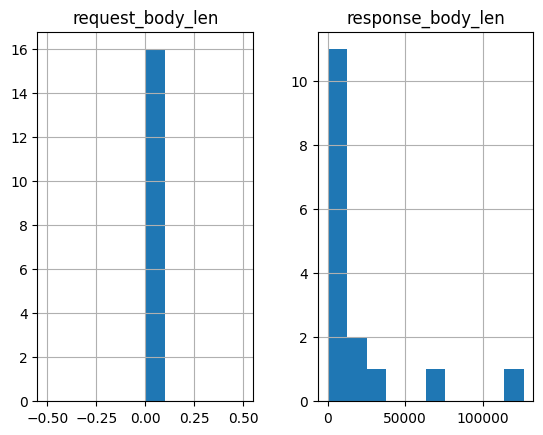

In [2]:
http_df[['request_body_len','response_body_len']].hist()

## Let's look at our data again
Since ZAT automatically makes the timestamp the index, we can plot volume over time super easy.

Text(0.5, 0, 'HTTP Requests per Second')

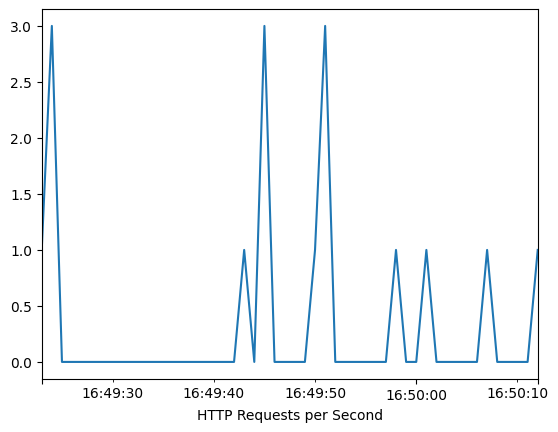

In [3]:
http_df['uid'].resample('1S').count().plot()
plt.xlabel('HTTP Requests per Second')